# Bank Marketing Segmentation

### Problem Statement
#### A Group of Companies is planning a new financial campaign. To make the campaign effective, we need to understand our customers better by grouping them based on their behaviors and characteristics.
#### Our goal is to perform a clustering analysis on our bank marketing data. This will help us identify different customer segments and create targeted ads for each group.

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

# visualization librarry
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data modelling library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import k_means, dbscan, KMeans

In [2]:
data = pd.read_csv('cleaned bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,40.537748,1504.227152,15.522517,742.004636,2.635099,10.374172,0.194040
std,10.923535,2572.687957,8.248089,456.674503,2.450293,48.824822,1.214597
min,19.000000,-1129.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,32.000000,129.250000,8.000000,436.000000,1.000000,-1.000000,0.000000
50%,39.000000,620.000000,16.000000,686.000000,2.000000,-1.000000,0.000000
75%,48.000000,1782.500000,21.000000,989.500000,3.000000,-1.000000,0.000000
max,90.000000,34646.000000,31.000000,3881.000000,29.000000,345.000000,29.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1510 non-null   int64 
 1   job        1510 non-null   object
 2   marital    1510 non-null   object
 3   education  1510 non-null   object
 4   default    1510 non-null   object
 5   balance    1510 non-null   int64 
 6   housing    1510 non-null   object
 7   loan       1510 non-null   object
 8   contact    1510 non-null   object
 9   day        1510 non-null   int64 
 10  month      1510 non-null   object
 11  duration   1510 non-null   int64 
 12  campaign   1510 non-null   int64 
 13  pdays      1510 non-null   int64 
 14  previous   1510 non-null   int64 
 15  poutcome   1510 non-null   object
 16  deposit    1510 non-null   object
dtypes: int64(7), object(10)
memory usage: 200.7+ KB


In [7]:
data['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [8]:
data['job'].value_counts()

job
management       352
blue-collar      282
technician       268
admin.           159
services         123
retired           82
unemployed        61
entrepreneur      61
self-employed     56
housemaid         33
student           25
unknown            8
Name: count, dtype: int64

In [9]:
data['job'] = ['management' if x in ['admin.','management'] else x for x in data['job']]
data['job'] = ['unemployed' if x in ['student','unknown','retired','unemployed'] else x for x in data['job']]
data['job'] = ['services' if x in ['technician','housemaid','blue-collar','services'] else x for x in data['job']]
data['job'] = ['entrepreneur' if x in ['self-employed','entrepreneur'] else x for x in data['job']]

In [10]:
data['job'].value_counts()

job
services        706
management      511
unemployed      176
entrepreneur    117
Name: count, dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

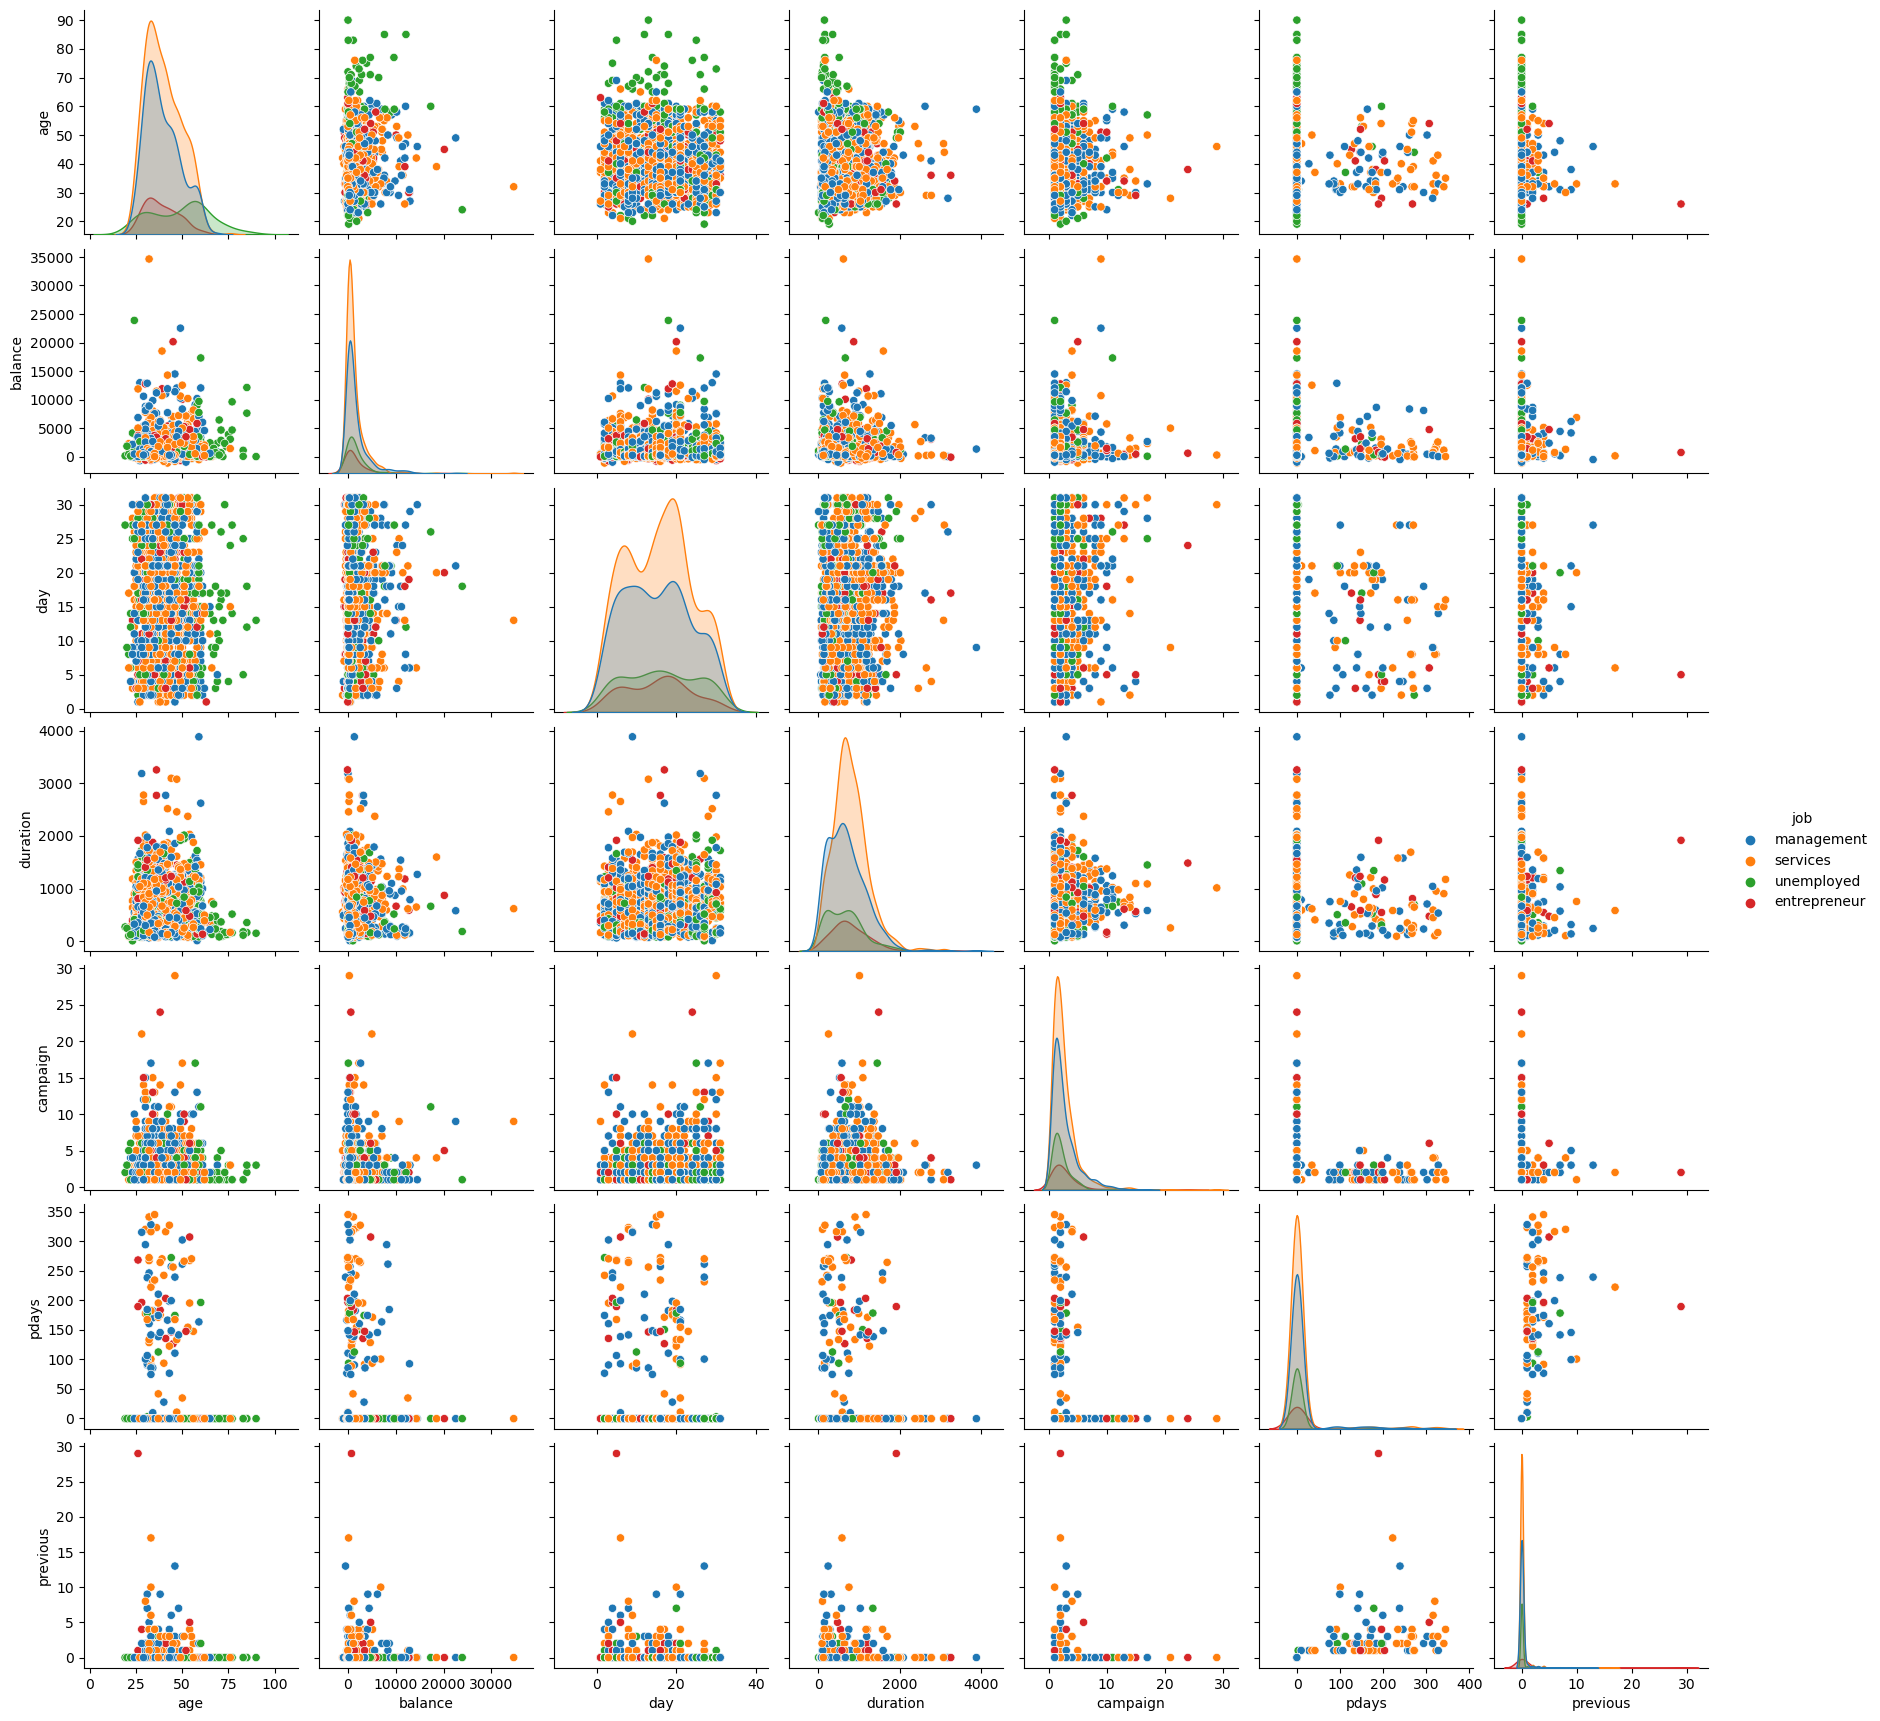

In [11]:
sns.pairplot(data, hue='job')

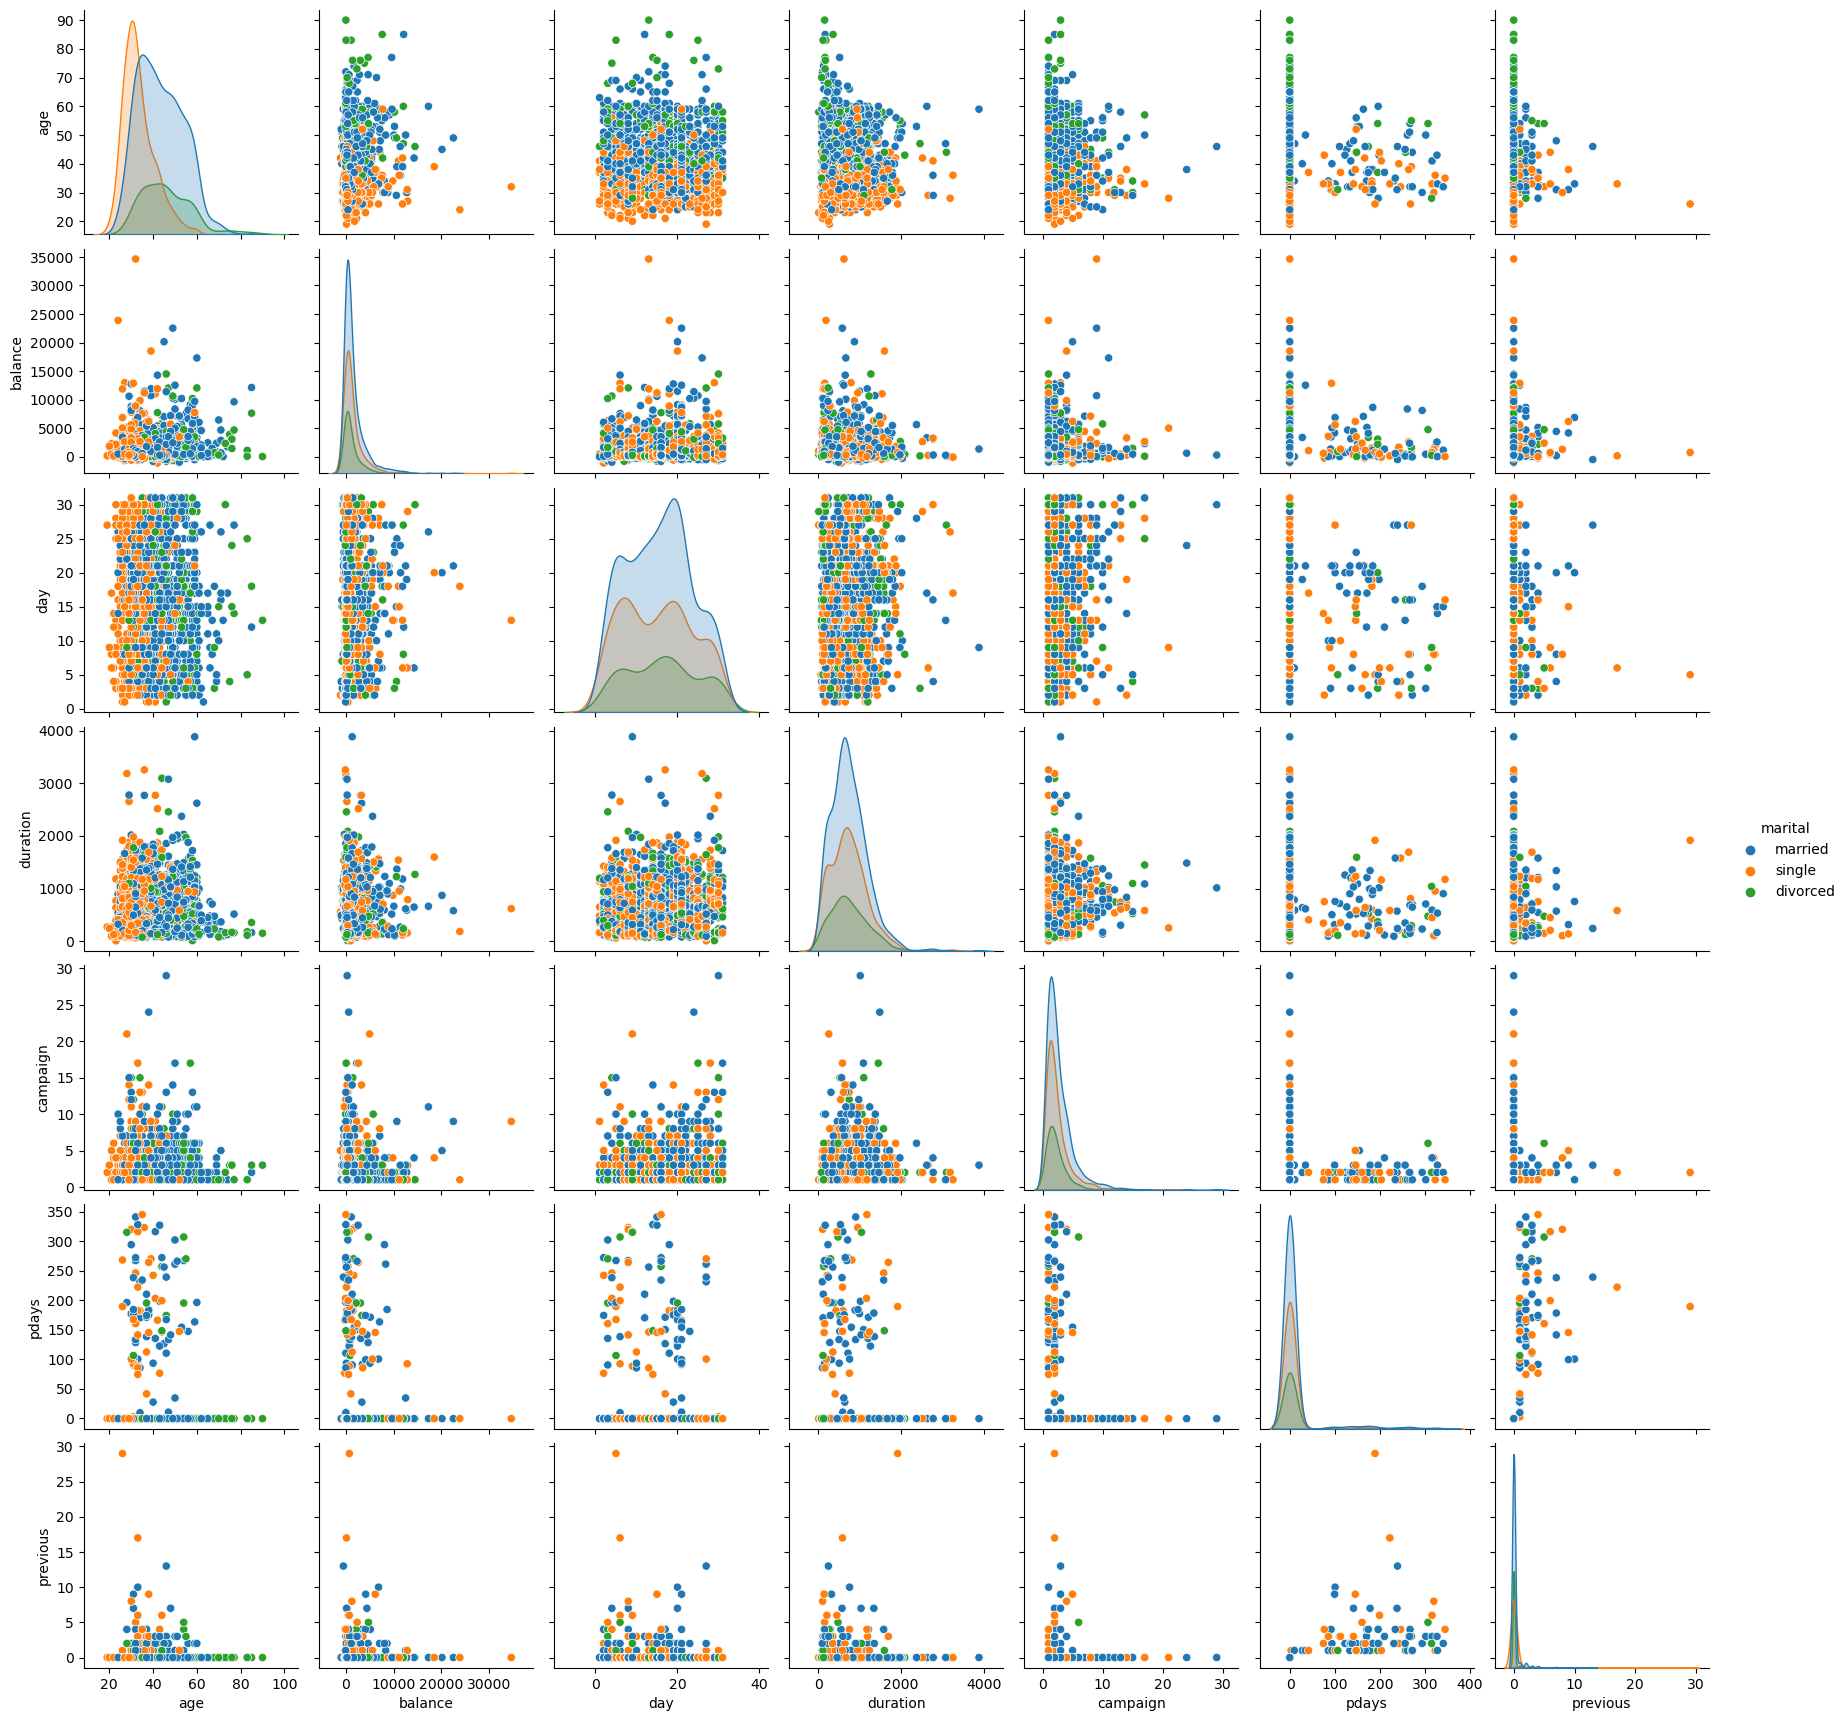

In [12]:
sns.pairplot(data, hue='marital')

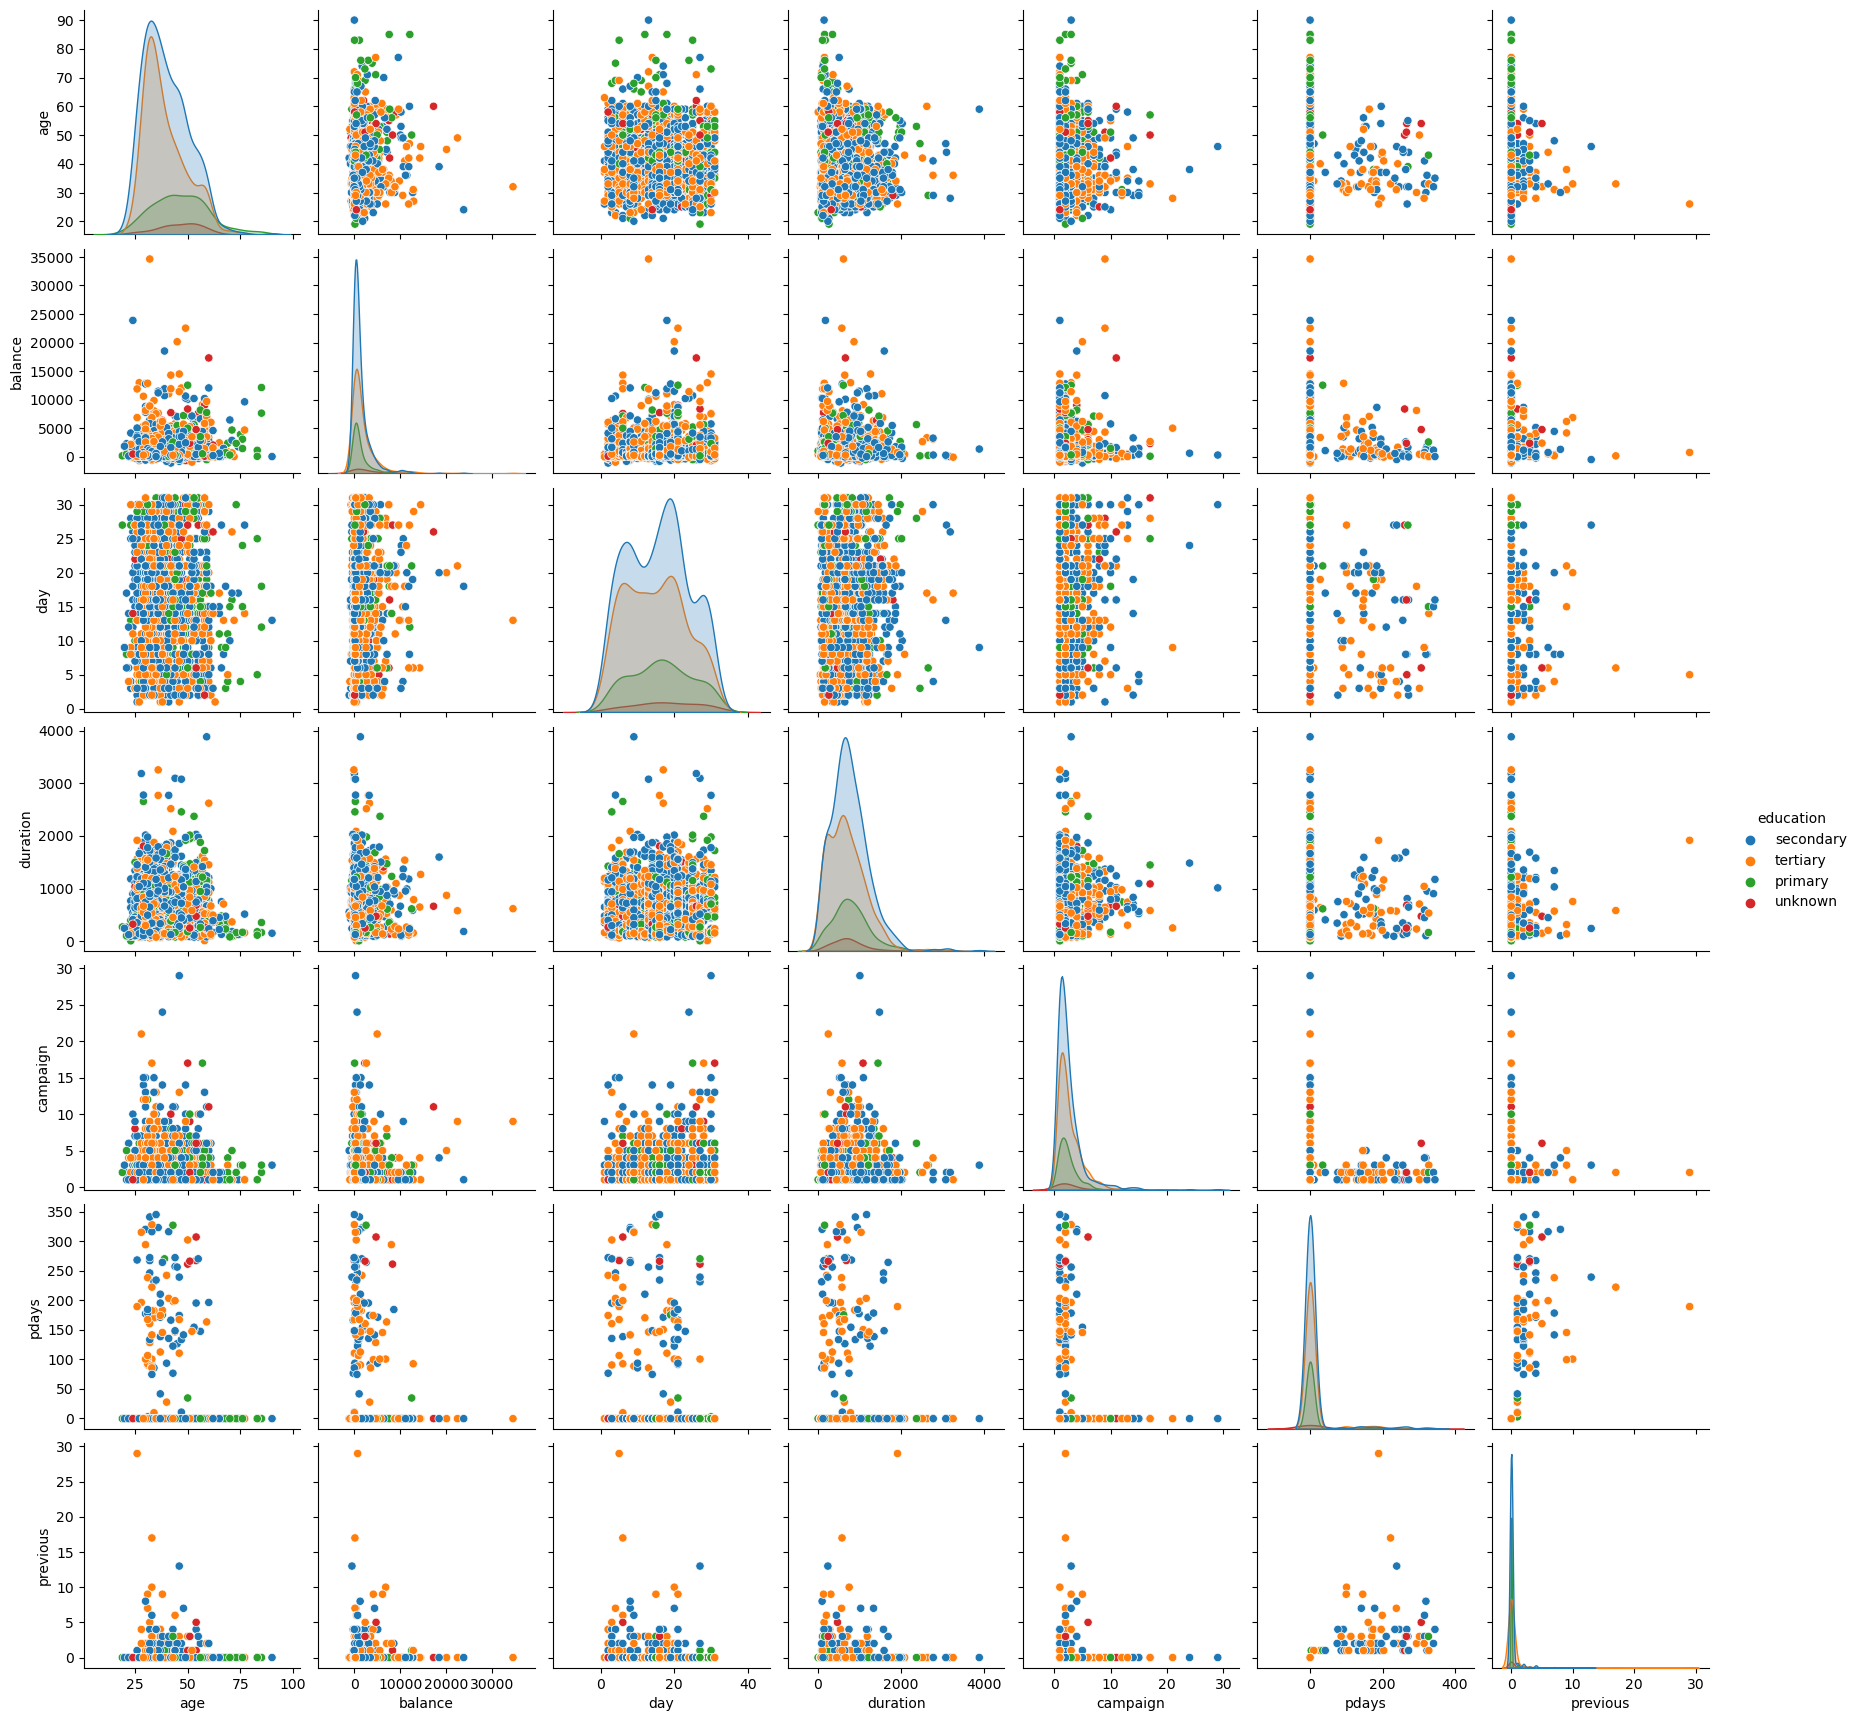

In [13]:
sns.pairplot(data, hue='education')

In [14]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,services,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [15]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
encoder = LabelEncoder()
for cols in cat_cols:
    data[f'{cols}_nums'] = encoder.fit_transform(data[cols])

In [16]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_nums,marital_nums,education_nums,default_nums,housing_nums,loan_nums,contact_nums,month_nums,poutcome_nums,deposit_nums
0,59,management,married,secondary,no,2343,yes,no,unknown,5,...,1,1,1,0,1,0,2,8,3,0
1,56,management,married,secondary,no,45,no,no,unknown,5,...,1,1,1,0,0,0,2,8,3,0
2,41,services,married,secondary,no,1270,yes,no,unknown,5,...,2,1,1,0,1,0,2,8,3,0


In [17]:
bank_df = data.drop(columns = cat_cols)

In [18]:
bank_df.head(3)

,age,balance,day,duration,campaign,pdays,previous,job_nums,marital_nums,education_nums,default_nums,housing_nums,loan_nums,contact_nums,month_nums,poutcome_nums,deposit_nums
0,59,2343,5,1042,1,-1,0,1,1,1,0,1,0,2,8,3,0
1,56,45,5,1467,1,-1,0,1,1,1,0,0,0,2,8,3,0
2,41,1270,5,1389,1,-1,0,2,1,1,0,1,0,2,8,3,0


## Data Modelling

In [19]:
scale = StandardScaler()
scale_df = scale.fit_transform(bank_df)
bank_df = pd.DataFrame(data = scale_df, columns= bank_df.columns)
bank_df.head(4)

,age,balance,day,duration,campaign,pdays,previous,job_nums,marital_nums,education_nums,default_nums,housing_nums,loan_nums,contact_nums,month_nums,poutcome_nums,deposit_nums
0,1.690695,0.326138,-1.276175,0.657131,-0.667529,-0.233036,-0.159809,-0.789589,-0.260946,-0.382191,-0.137453,1.075706,-0.415163,1.621363,1.025689,0.246778,0.0
1,1.415968,-0.567387,-1.276175,1.588080,-0.667529,-0.233036,-0.159809,-0.789589,-0.260946,-0.382191,-0.137453,-0.929622,-0.415163,1.621363,1.025689,0.246778,0.0
2,0.042331,-0.091074,-1.276175,1.417223,-0.667529,-0.233036,-0.159809,0.477446,-0.260946,-0.382191,-0.137453,1.075706,-0.415163,1.621363,1.025689,0.246778,0.0
3,1.324392,0.377852,-1.276175,-0.357057,-0.667529,-0.233036,-0.159809,0.477446,-0.260946,-0.382191,-0.137453,1.075706,-0.415163,1.621363,1.025689,0.246778,0.0


In [20]:
pca = PCA(n_components=3)
columns = ['col1','col2','col3']
pca_df = pca.fit_transform(bank_df)
pca_df = pd.DataFrame(data = pca_df, columns=columns)

In [ ]:
px.scatter_3d(data_frame=pca_df, x = 'col1', y = 'col2', z = 'col3', color='col1')

In [ ]:
# Calculate WCSS for different number of clusters
# WCSS = Within-Cluster Sum of Square

WCSS_bank = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    WCSS_bank.append(kmeans.inertia_)

In [ ]:
# chossing the number of clusters 
# plot an elbow graph

plt.plot(range(1, 11), WCSS_bank)

### Interpret the eblow graph and findings

* The data points are best grouped into 4 distinct clusters.
* Four clusters provide a good balance between simplicity and the ability to capture the structure of the data.

In [ ]:
# Traning the KMeans Clustering Model

kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
bank = kmeans.fit_predict(pca_df)
print(bank)

In [ ]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = bank

# Create scatter plot for each cluster using Plotly

px.scatter_3d(pca_df, x='col1', y='col2', z='col3', color=pca_df['Cluster'].astype(str),
                 title='Clusters of Customers', labels={'col1': 'PCA 1', 'col2': 'PCA 2', 'col3': 'PCA 3'})

In [ ]:
# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = bank

# Create scatter plot for each cluster using plt

plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['Cluster'] == 0]['col1'], pca_df[pca_df['Cluster'] == 0]['col2'], s=20, label='Cluster 1')
plt.scatter(pca_df[pca_df['Cluster'] == 1]['col1'], pca_df[pca_df['Cluster'] == 1]['col2'], s=20, label='Cluster 2')
plt.scatter(pca_df[pca_df['Cluster'] == 2]['col1'], pca_df[pca_df['Cluster'] == 2]['col2'], s=20, label='Cluster 3')
plt.scatter(pca_df[pca_df['Cluster'] == 3]['col1'], pca_df[pca_df['Cluster'] == 3]['col2'], s=20, label='Cluster 4')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='*', label='Centroids')

# Adding labels and title
plt.title('Clusters of Customers')
plt.legend()

In [ ]:
# Assign cluster labels
data['clusters'] = ['cl1' if x == 1 else 'cl2' if x == 2 else
                    'cl3' if x == 3 else 'cl4' for x in bank]

In [ ]:
px.histogram(data_frame=data, x = 'clusters', y = 'balance',
             color = 'job', barmode='group')

#### Interpretation
* There is a significant number of customers in Services, followed by Management in cluster 4. Fewer customers are Unemployed or Entrepreneurs.
* Cluster 1 is Dominated by Management and Entrepreneur customers, with a moderate number in Services and fewer Unemployed customers.
* There is a mix of customers across Management, Services, and Unemployed, with a small number of Entrepreneurs  in cluster 3.
* Cluster 2, Shows a balanced distribution across Management, Services, and a small number of Unemployed and Entrepreneur customers.
#### Recommendations
* Design specific marketing campaigns for each cluster based on their characteristics and needs.
* Focus on engaging Management and Services customers, as they are the majority in most clusters.
* Offer tailored services or products to support Entrepreneur customers, especially in clusters where they are prominent.
* Implement retention strategies for Unemployed customers to keep them engaged with the company.

In [ ]:
px.histogram(data_frame=data, x = 'clusters', y = 'balance',
             color = 'education', barmode='group')

#### Interpretation
* Most customers have secondary education, followed by tertiary and primary education. Few have unknown education in cluster 4.
* Cluster 1 is Dominated by customers with tertiary education, with significant numbers in secondary and primary education.
* There are Predominantly customers with secondary education, fewer in primary and tertiary education in cluster 3.
* Cluster 2 has the Fewest customers overall, with a slight majority having tertiary education.
#### Recommendations
* Tailor marketing messages based on educational backgrounds.
* Create specific product offers and services that cater to the different educational levels.
* Develop targeted strategies for each cluster, considering their educational composition and needs.

In [ ]:
px.histogram(data_frame=data, x = 'clusters', y = 'balance',
             color = 'marital', barmode='group')

#### Interpretation
* Cluster 4 has Mostly married customers, followed by single and divorced.
* Cluster 1 has Majority single customers, with a significant number of married and very few divorced.
* There are Predominantly married, with a notable portion of divorced and very few single customers in cluster 3.
* Cluster 2 has Mostly married, with smaller groups of single and divorced customers.
#### Recommendations
* For clusters with more married customers (Clusters 4 and 3), offer products and services that appeal to families, such as family savings plans.
* For Cluster 1, which has more single customers, focus on individual investment options, personal loans.
* For clusters with higher divorced customers (Cluster 3), provide financial planning services or products that cater to their specific needs.
* Cluster 2 has a relatively balanced distribution, so ensure marketing strategies cater to all marital statuses equally.
* Customize marketing messages and financial advice to align with the marital status distribution in each cluster.

## Age-Group

In [ ]:
data['age_group']=['youth' if x <=36 else 'adult' if x <=54  else 'middle_age' if x <=72 else 'old_age' for x in data['age']]
data['age_group'].value_counts()

In [ ]:
px.histogram(data_frame=data, x = 'clusters', y = 'balance',  histfunc= 'sum',
             color = 'age_group', barmode='group')

#### Interpretation
* Cluster 4 has Mostly adults, followed by youth and middle-aged, with no old age customers.
* Cluster 3, Balanced between middle-aged and adults, fewer youth, and some old age customers.
* Cluster 2 has Predominantly youth and adults, with a smaller group of middle-aged, and no old age customers.
* Cluster 1 has the highest number of youth ,followed by adult, and very few middle-aged with no old age customers
#### Recommendations
* For Cluster 1 and 4 with a high number of youth, promote student loans, savings accounts, and mobile banking solutions.
* For Clusters 4 and 1 with high Adult, focus on investment opportunities and retirement planning,that cater to adult customers.
* In Cluster 3, offer a mix of retirement planning and mid-career financial services for Middle_age.
* Cluster 3 has old age customers; consider products like retirement accounts, health insurance, and estate planning for this group.
* Tailor marketing messages for each cluster based on their dominant age groups, ensuring relevant and engaging content.

## Recommendations
* Use the insights from the clusters to develop highly personalized marketing campaigns. Tailor messages and product offerings to the specific needs and characteristics of each cluster.
* Invest in creating educational content that addresses the financial needs and questions of each segment. This will help in building trust and long-term relationships with your customers.
* Enhance digital engagement tools, such as mobile apps and online banking platforms, especially targeting the younger segments who are more likely to use these services.
* Balance your product offerings between family-oriented financial solutions and individual-focused products. Ensure that you cater to both groups effectively to maximize engagement and customer satisfaction.
* Develop retention programs for high-value segments like married adults, and single, and tertiary customers. Offer loyalty rewards, personalized financial advice, and exclusive product offers.
* Implement a system for continuous monitoring and analysis of customer data. This will help in identifying changes in customer behavior and allow for timely adjustments to the campaign strategies.

